In [1]:
import pickle

In [27]:
trump_data = pickle.load(open("TRUMP_SNIPPETS_DF.pickle", "rb" ))
obama_data = pickle.load(open("OBAMA_SNIPPETS_DF.pickle", "rb" ))

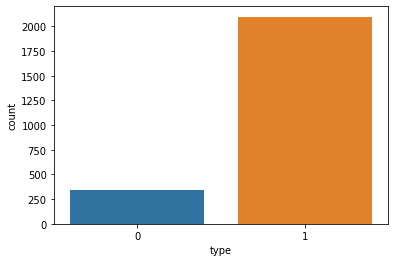

In [3]:
import seaborn as sns
sns.countplot(x='type', data=trump_data)

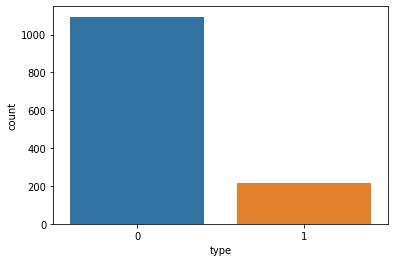

In [4]:
sns.countplot(x='type', data=obama_data)

In [5]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
from nltk.tokenize import word_tokenize

def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

[nltk_data] Downloading package stopwords to /home/daniel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

def setup(df,tran_data='transcript',label='type'):
    X = []
    y = np.array(df[label])
    sentences = np.array(df[tran_data])
    for sen in sentences:
        X.append(preprocess_text(sen))
    return np.array(X),y

def _train_test_split(X,y,npz_filename=''+'.npz',test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(type(X_train))
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    np.savez_compressed(npz_filename,
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test)
    print("Saved {} as .npz".format(npz_filename))
    

In [33]:
trump_X, trump_y = setup(trump_data)
obama_X, obama_y = setup(obama_data)
type(trump_X)

numpy.ndarray

In [31]:
typnp.array(obama_X)

numpy.ndarray

In [24]:
_train_test_split(np.array(trump_X), np.array(trump_y), npz_filename="TRUMP_SPLIT_DATA")

<class 'numpy.ndarray'>
(1949,) (1949,) (488,) (488,)
Saved TRUMP_SPLIT_DATA as .npz


In [25]:
_train_test_split(obama_X, obama_y, npz_filename="OBAMA_SPLIT_DATA")

<class 'list'>


AttributeError: 'list' object has no attribute 'shape'